#### Import library

In [1]:
# 라이브러리 추가하기
import geopandas as gpd
import pandas as pd

%matplotlib inline

#### 서울시 행정동 goeJson 불러오기
* GeoDataframe 생성하기
* 데이터 확인하기
* plot()으로 지도 확인하기

In [2]:
# 서울시 법정동 geojson 파일
_seoul_h_dong = './maps/output/seoul_h_dong.geojson'

In [4]:
# GeoDataFrame
seoul_h_dong_gdf = gpd.read_file(_seoul_h_dong)
seoul_h_dong_gdf.info()
seoul_h_dong_gdf.head(10)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 11 columns):
SGG_NM        424 non-null object
DONG_NM       424 non-null object
SGG_CODE      424 non-null object
H_CODE        424 non-null object
SEDAE         424 non-null int64
SEDAE_INGU    424 non-null float64
TOTAL_POP     424 non-null int64
MALE_POP      424 non-null int64
FEMALE_POP    424 non-null int64
65_OVER       424 non-null int64
geometry      424 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 36.5+ KB


,SGG_NM,DONG_NM,SGG_CODE,H_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geometry
0,종로구,사직동,11110,1111000,4414,2.14,9717,4467,5250,1708,"POLYGON ((126.9768888427482 37.57565077944879,..."
1,종로구,삼청동,11110,1111000,1414,2.06,3097,1459,1638,634,"POLYGON ((126.982689386493 37.5950655194224, 1..."
2,종로구,부암동,11110,1111000,4325,2.39,10726,5160,5566,1748,"POLYGON ((126.9758511377569 37.59656422224408,..."
3,종로구,평창동,11110,1111000,7510,2.53,19163,9032,10131,3037,"POLYGON ((126.9750746678809 37.63138628651299,..."
4,종로구,무악동,11110,1111000,3024,2.75,8375,3921,4454,1279,"POLYGON ((126.960673532739 37.58079784202972, ..."
5,종로구,교남동,11110,1111000,4379,2.34,10363,4850,5513,1406,"POLYGON ((126.9690483700185 37.56819441770833,..."
6,종로구,가회동,11110,1111000,2085,2.17,4657,2194,2463,900,"POLYGON ((126.9891359030894 37.59130668631862,..."
7,종로구,종로1.2.3.4가동,11110,1111000,5378,1.41,8592,5045,3547,1865,"POLYGON ((126.9964997845193 37.5810225677299, ..."
8,종로구,종로5·6가동,11110,1111000,3174,1.69,5690,3096,2594,1089,"POLYGON ((127.0101604483956 37.57156810157083,..."
9,종로구,이화동,11110,1111000,4462,1.85,8752,4075,4677,1302,"POLYGON ((127.0073325396313 37.58320333921623,..."


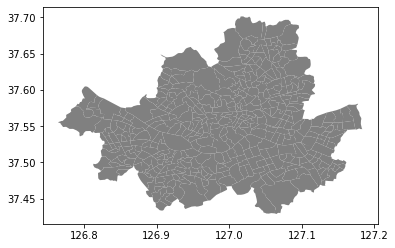

In [5]:
# 법정동 지도 보기
seoul_h_dong_gdf.plot(color='gray')

####  Dissolve를 이용해 행정동 -> 시군구 지도 데이터 만들기

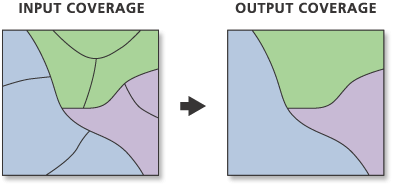

In [6]:
# Dissolve를 이용해 시군구 데이터 만들기
seoul_sgg = seoul_h_dong_gdf.dissolve(by=['SGG_NM','SGG_CODE'], aggfunc='sum')
seoul_sgg

,,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
SGG_NM,SGG_CODE,,,,,,,
강남구,11680,"POLYGON ((127.1110354206454 37.48293504402488,...",231612,54.29,561052,268941,292111,65060
강동구,11740,"POLYGON ((127.1458000886755 37.52198996684139,...",177407,45.24,440359,218699,221660,56161
강북구,11305,"POLYGON ((127.0220295465139 37.6122870292313, ...",142533,29.67,328002,160252,167750,56530
강서구,11500,"POLYGON ((126.8831662843492 37.55446522843518,...",254257,47.24,608255,296175,312080,76032
관악구,11620,"POLYGON ((126.9704905925551 37.4753683309936, ...",255352,42.12,520929,262006,258923,70046
광진구,11215,"POLYGON ((127.0922507470111 37.5267860261998, ...",160798,33.30,372298,180645,191653,43953
구로구,11530,"POLYGON ((126.8953972611576 37.49203217901983,...",171570,35.71,441559,221386,220173,58794
금천구,11545,"POLYGON ((126.9152195932067 37.44005599984209,...",106066,22.57,253491,129775,123716,34170
노원구,11350,"POLYGON ((127.0680069739077 37.61556823410262,...",217619,48.92,558075,271025,287050,74243


In [7]:
seoul_sgg.reset_index(inplace=True)
seoul_sgg

,SGG_NM,SGG_CODE,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
0,강남구,11680,"POLYGON ((127.1110354206454 37.48293504402488,...",231612,54.29,561052,268941,292111,65060
1,강동구,11740,"POLYGON ((127.1458000886755 37.52198996684139,...",177407,45.24,440359,218699,221660,56161
2,강북구,11305,"POLYGON ((127.0220295465139 37.6122870292313, ...",142533,29.67,328002,160252,167750,56530
3,강서구,11500,"POLYGON ((126.8831662843492 37.55446522843518,...",254257,47.24,608255,296175,312080,76032
4,관악구,11620,"POLYGON ((126.9704905925551 37.4753683309936, ...",255352,42.12,520929,262006,258923,70046
5,광진구,11215,"POLYGON ((127.0922507470111 37.5267860261998, ...",160798,33.30,372298,180645,191653,43953
6,구로구,11530,"POLYGON ((126.8953972611576 37.49203217901983,...",171570,35.71,441559,221386,220173,58794
7,금천구,11545,"POLYGON ((126.9152195932067 37.44005599984209,...",106066,22.57,253491,129775,123716,34170
8,노원구,11350,"POLYGON ((127.0680069739077 37.61556823410262,...",217619,48.92,558075,271025,287050,74243
9,도봉구,11320,"POLYGON ((127.0463547756851 37.63915622931054,...",137378,35.03,346234,169553,176681,53488


In [8]:
seoul_sgg.info()
seoul_sgg.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
SGG_NM        25 non-null object
SGG_CODE      25 non-null object
geometry      25 non-null object
SEDAE         25 non-null int64
SEDAE_INGU    25 non-null float64
TOTAL_POP     25 non-null int64
MALE_POP      25 non-null int64
FEMALE_POP    25 non-null int64
65_OVER       25 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.8+ KB


,SGG_NM,SGG_CODE,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
0,강남구,11680,"POLYGON ((127.1110354206454 37.48293504402488,...",231612,54.29,561052,268941,292111,65060
1,강동구,11740,"POLYGON ((127.1458000886755 37.52198996684139,...",177407,45.24,440359,218699,221660,56161
2,강북구,11305,"POLYGON ((127.0220295465139 37.6122870292313, ...",142533,29.67,328002,160252,167750,56530
3,강서구,11500,"POLYGON ((126.8831662843492 37.55446522843518,...",254257,47.24,608255,296175,312080,76032
4,관악구,11620,"POLYGON ((126.9704905925551 37.4753683309936, ...",255352,42.12,520929,262006,258923,70046


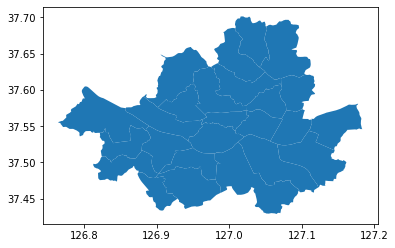

In [9]:
seoul_sgg.plot()

In [10]:
# 시군구 geojson 생성하기
# 불필요한 컬럼 제거하기
columns = ['SGG_CODE','SGG_NM','SEDAE','SEDAE_INGU','TOTAL_POP','MALE_POP','FEMALE_POP','65_OVER','geometry']
gdf = gpd.GeoDataFrame(seoul_sgg[columns], geometry='geometry')
gdf.to_file('./maps/output/seoul_sgg.geojson' , driver='GeoJSON')

# 서울시 스타벅스 매장 목록
* 서울시 스타벅스 매장 목록 엑셀 파일 불러오기
* 위도, 경도 좌표 정보를 이용해 GeoDataFrame으로 변환하기
* 서울시 스타벅스 매장 목록 데이터를 지도파일로 저장하기

In [11]:
seoul_starbucks = pd.read_excel('./files/seoul_starbucks.xlsx')
seoul_starbucks.info()
seoul_starbucks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
STORE_NAME    495 non-null object
LAT           495 non-null float64
LONG          495 non-null float64
STORE_TYPE    495 non-null object
SIG_KOR_NM    495 non-null object
SIG_CD        495 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.3+ KB


,STORE_NAME,LAT,LONG,STORE_TYPE,SIG_KOR_NM,SIG_CD
0,역삼아레나빌딩,37.501087,127.043069,general,강남구,11680
1,논현역사거리,37.510178,127.022223,general,강남구,11680
2,대치대원빌딩R,37.494668,127.062583,reserve,강남구,11680
3,삼성역섬유센터R,37.507750,127.060651,reserve,강남구,11680
4,압구정R,37.527367,127.033061,reserve,강남구,11680


In [12]:
# 시군구 코드를 문자타입으로 변경하기
seoul_starbucks = seoul_starbucks.astype({'SIG_CD':'str'})
seoul_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
STORE_NAME    495 non-null object
LAT           495 non-null float64
LONG          495 non-null float64
STORE_TYPE    495 non-null object
SIG_KOR_NM    495 non-null object
SIG_CD        495 non-null object
dtypes: float64(2), object(4)
memory usage: 23.3+ KB


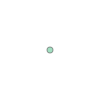

In [13]:
# 엑셀 파일의 위도 경도 데이터를 Point타압의 geometry 데이터로 변환하기
geometry = gpd.points_from_xy(seoul_starbucks.LONG, seoul_starbucks.LAT)
geometry[0]

In [14]:
# GeoDataFrame 생성하기
coulumns = ['STORE_NAME', 'STORE_TYPE', 'SIG_CD', 'SIG_KOR_NM']
seoul_sb_gdf = gpd.GeoDataFrame(seoul_starbucks[coulumns], geometry=geometry)
seoul_sb_gdf.info()
seoul_sb_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
STORE_NAME    495 non-null object
STORE_TYPE    495 non-null object
SIG_CD        495 non-null object
SIG_KOR_NM    495 non-null object
geometry      495 non-null object
dtypes: object(5)
memory usage: 19.4+ KB


,STORE_NAME,STORE_TYPE,SIG_CD,SIG_KOR_NM,geometry
0,역삼아레나빌딩,general,11680,강남구,POINT (127.043069 37.501087)
1,논현역사거리,general,11680,강남구,POINT (127.022223 37.510178)
2,대치대원빌딩R,reserve,11680,강남구,POINT (127.062583 37.494668)
3,삼성역섬유센터R,reserve,11680,강남구,POINT (127.060651 37.50775)
4,압구정R,reserve,11680,강남구,POINT (127.033061 37.5273669)


In [15]:
type(seoul_sb_gdf)

geopandas.geodataframe.GeoDataFrame

In [16]:
# 폴더생성
!mkdir ./maps/final

In [17]:
# 서울시 스타벅스 매장 지도 파일 생성하기
seoul_sb_gdf.to_file('./maps/final/seoul_starbucks.geojson', driver='GeoJSON')